In [167]:
import requests
import pandas as pd
from vega_datasets import data
import numpy as np
import wrangle

# SF Temps

In [2]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [5]:
temps_df = data.sf_temps()

In [13]:
temps_df['date'] = pd.to_datetime(temps_df['date'])
temps_df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [14]:
temps_df = temps_df.set_index('date')

Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

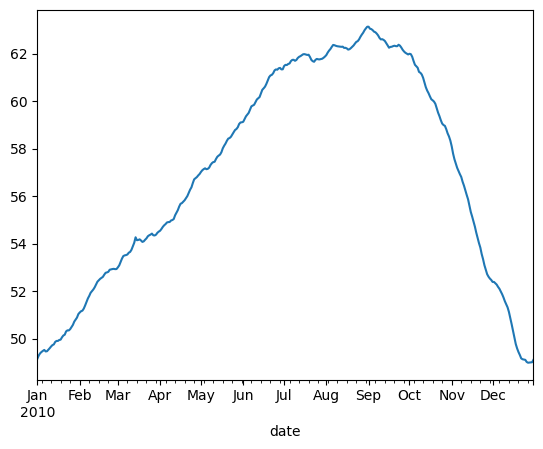

In [16]:
temps_df.resample('d')['temp'].mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

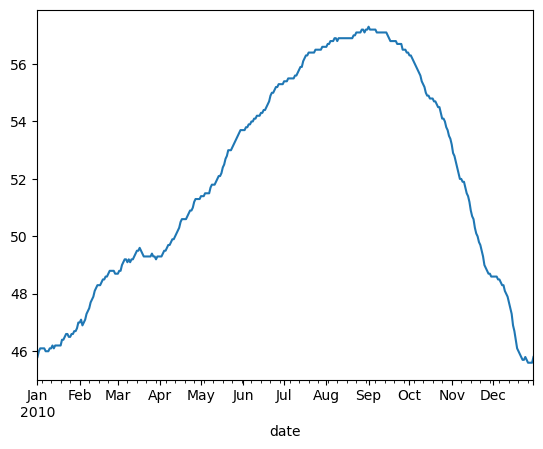

In [18]:
temps_df.resample('d')['temp'].min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

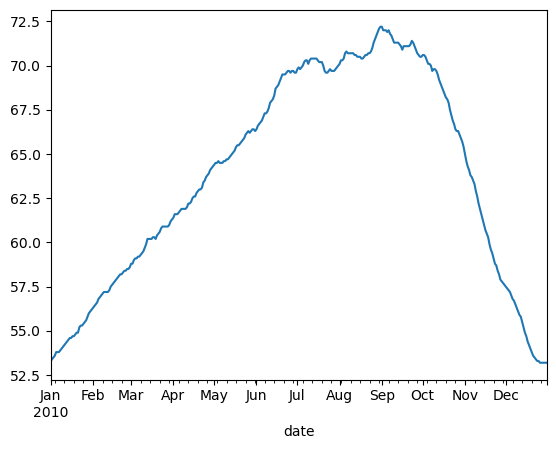

In [19]:
temps_df.resample('d')['temp'].max().plot()

Which month is the coldest, on average?

In [32]:
temps_df.resample('m').mean().sort_values(by='temp')
#January

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


Which month has the highest average temperature?

In [33]:
temps_df.resample('m').mean().sort_values(by='temp', ascending = False)
#September

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.

In [39]:
delta_df = pd.DataFrame((temps_df.resample('d')['temp'].max() - temps_df.resample('d')['temp'].min()))

In [41]:
delta_df.rename(columns = {'temp':'temp_change'}, inplace = True)

delta_df.head()

,temp_change
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7


Which month has the highest daily temperature variability?

In [45]:
delta_df.resample('m').mean().sort_values(by = 'temp_change', ascending = False)
#september

,temp_change
date,
2010-09-30,14.403333
2010-07-31,13.977419
2010-06-30,13.950000
2010-08-31,13.870968
2010-10-31,13.432258
2010-05-31,12.909677
2010-04-30,12.320000
2010-03-31,10.854839
2010-11-30,10.236667


<AxesSubplot:xlabel='date'>

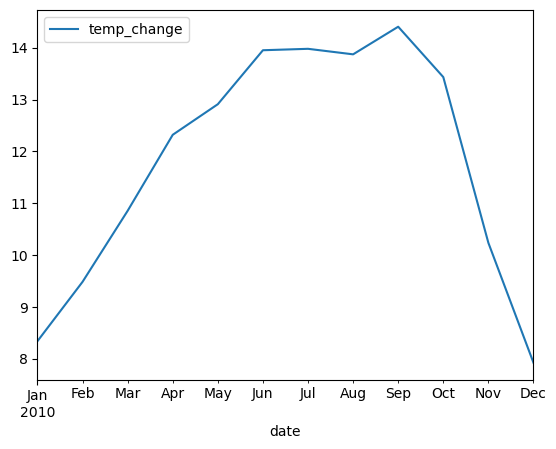

In [46]:
delta_df.resample('m').mean().plot()

# Seattle Weather 

In [3]:
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [47]:
rain_df = data.seattle_weather()

In [48]:
rain_df['date'] = pd.to_datetime(rain_df['date'])
rain_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [51]:
rain_df = rain_df.set_index('date')

In [52]:
rain_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


Which year and month combination has the highest amount of precipitation?

In [156]:
rain_df.resample('m').sum().sort_values(by = 'precipitation', ascending = False).head(3)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2014-03-31,240.0,400.1,168.2,114.0
2015-11-30,212.6,290.5,104.4,106.4


Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

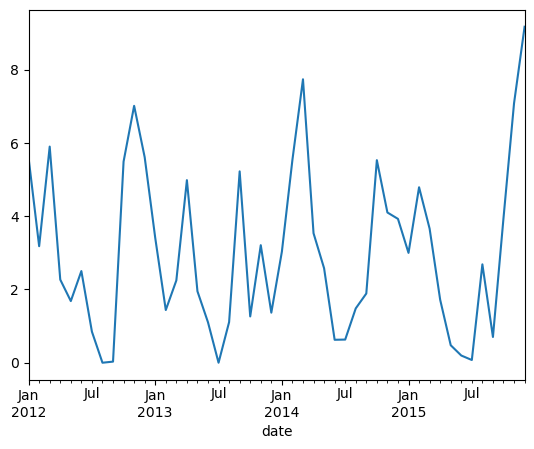

In [61]:
rain_df.resample('m').mean()['precipitation'].plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

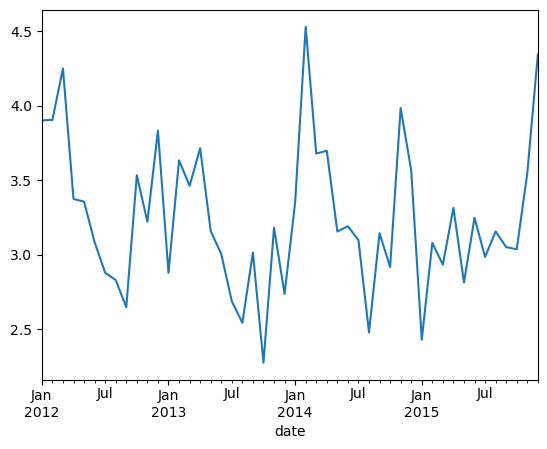

In [66]:
rain_df.resample('m').mean()['wind'].plot()

Which year-month combination is the windiest?

In [157]:
rain_df.resample('m').mean().sort_values(by = 'wind', ascending = False).head(3)



,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.200000,2.635714,4.528571
2015-12-31,9.177419,8.380645,3.825806,4.341935
2012-03-31,5.903226,9.554839,2.838710,4.248387


What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [69]:
sun_df = rain_df[rain_df['weather'] == 'sun']
sun_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun


In [73]:
sun_df.resample('y').count().sort_values(by = 'weather', ascending = False)

#2014

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,211,211,211,211,211
2013-12-31,205,205,205,205,205
2015-12-31,180,180,180,180,180
2012-12-31,118,118,118,118,118


In which month does it rain the most?

In [74]:
precip_df = rain_df[rain_df['weather'] == 'rain']
precip_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain


In [88]:
precip_df['month'] = precip_df.index.month
precip_df.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_99548/1681788737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_df['month'] = precip_df.index.month


,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
2012-01-06,2.5,4.4,2.2,2.2,rain,1


In [158]:
precip_df.groupby('month').precipitation.sum()

month
1     231.5
2     126.9
3     182.1
4      68.6
5      52.2
6      75.1
7      26.3
8      38.6
9       0.9
10    193.5
11    210.5
12    115.6
Name: precipitation, dtype: float64

In [97]:
rain = []

for i in range (1, 13):
    amount = precip_df[precip_df['month'] == i]['precipitation'].sum()
    rain.append(amount)

In [98]:
rain

[231.50000000000003,
 126.9,
 182.1,
 68.59999999999998,
 52.2,
 75.10000000000001,
 26.3,
 38.6,
 0.8999999999999999,
 193.50000000000003,
 210.49999999999997,
 115.6]

In [99]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
          'august', 'september', 'october', 'november', 'december']
          
rain_freq = pd.DataFrame({'month': months, 'rain_amount': rain})

In [100]:
rain_freq

,month,rain_amount
0,january,231.5
1,february,126.9
2,march,182.1
3,april,68.6
4,may,52.2
5,june,75.1
6,july,26.3
7,august,38.6
8,september,0.9
9,october,193.5


Which month has the most number of days with a non-zero amount of precipitation?

# Flights

In [4]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [104]:
flight_df = data.flights_20k()

In [105]:
flight_df['date'] = pd.to_datetime(flight_df['date'])
flight_df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

Convert any negative delays to 0.

In [ ]:
## Tasha answer: 

## flights['neg_delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])

In [108]:
for i in flight_df['delay']:
    if i < 0:
        flight_df = flight_df.replace(i, 0)

In [109]:
flight_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [114]:
flight_df = flight_df.set_index('date')

Which hour of the day has the highest average delay?

In [117]:
flight_df['hour'] = flight_df.index.hour

In [134]:
flight_df['hour'].max() 

23

In [148]:
delay_df = flight_df.groupby(['hour']).sum()

In [150]:
hour_count = flight_df.groupby(['hour']).count()

In [151]:
hour_count

,delay,distance,origin,destination
hour,,,,
0,12,12,12,12
1,1,1,1,1
3,2,2,2,2
5,37,37,37,37
6,972,972,972,972
7,1418,1418,1418,1418
8,1345,1345,1345,1345
9,1198,1198,1198,1198
10,1154,1154,1154,1154


In [152]:
delay_df['days_delayed'] = hour_count['delay']

In [154]:
delay_df['avg_delay'] = delay_df['delay']/delay_df['days_delayed']

In [155]:
delay_df

,delay,distance,days_delayed,avg_delay
hour,,,,
0,1535,5095,12,127.916667
1,170,256,1,170.000000
3,605,644,2,302.500000
5,19,12125,37,0.513514
6,2425,436344,972,2.494856
7,4356,751794,1418,3.071932
8,5421,751231,1345,4.030483
9,5993,674564,1198,5.002504
10,6752,592866,1154,5.850953


In [125]:
hour = np.arange(0, 24)

Does the day of the week make a difference in the delay amount?

In [160]:
flight_df['day'] = flight_df.index.day_name()

In [161]:
flight_df.groupby('day').delay.mean().sort_values(ascending = False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

Does the month make a difference in the delay amount?

In [162]:
flight_df['month'] = flight_df.index.month_name()

In [166]:
flight_df.head(40)

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March
2001-03-14 14:55:00,3,405,MCI,MDW,14,Wednesday,March
2001-03-14 19:04:00,20,1999,BWI,PHX,19,Wednesday,March
2001-01-22 09:05:00,0,628,ABQ,SAN,9,Monday,January
2001-01-30 19:15:00,22,358,SMF,BUR,19,Tuesday,January


In [163]:
flight_df.groupby('month').delay.mean().sort_values(ascending = False)

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64